<a href="https://colab.research.google.com/github/MuhammedAshraf2020/Paper-Code/blob/main/01%20-%20AlexNet/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d puneet6060/intel-image-classification

 98% 341M/346M [00:03<00:00, 138MB/s]
100% 346M/346M [00:03<00:00, 119MB/s]


In [ ]:
!unzip /content/intel-image-classification.zip

In [1]:
path = "/content/seg_train/seg_train"

In [2]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch , os
import matplotlib.pyplot as plt

In [3]:
names = ['buildings', 'forest',  'glacier',  'mountain' , 'sea',  'street' ]

In [4]:
transform = transforms.Compose([transforms.ToTensor() , transforms.Resize((400 , 400)) ])

In [5]:
dataset = torchvision.datasets.ImageFolder(path , transform = transform)

In [6]:
dataloader = DataLoader(dataset , batch_size = 16 , shuffle = True)

In [7]:
sample = next(iter(dataloader))

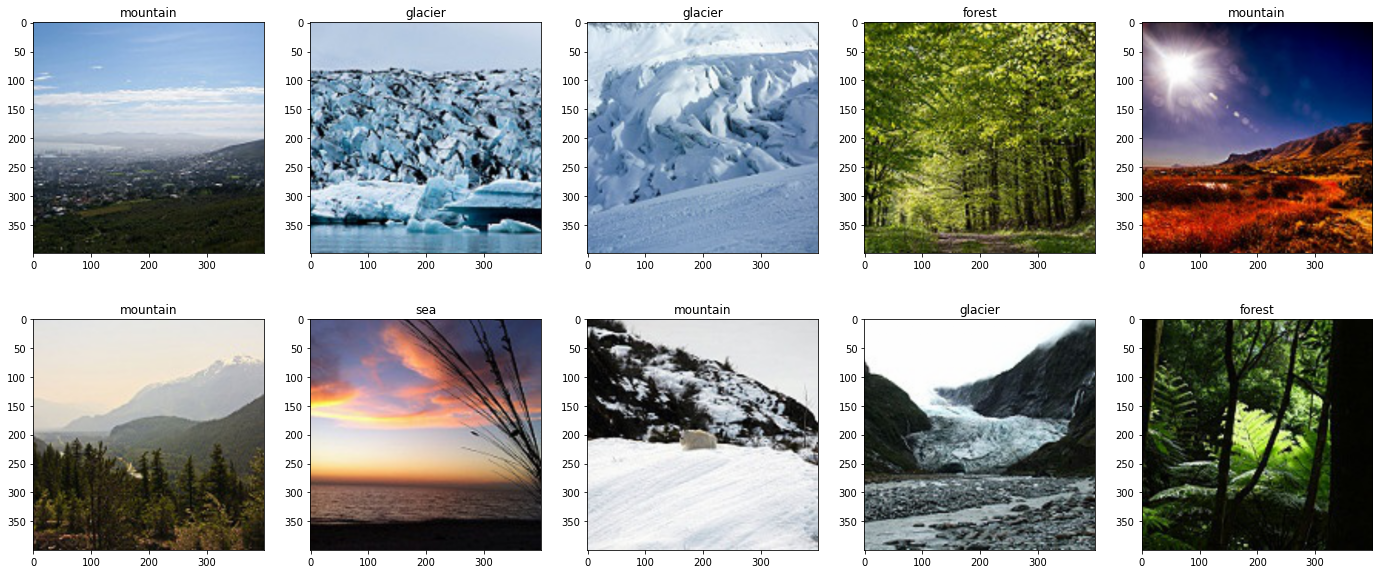

In [8]:
sub = plt.figure(figsize = (24 , 10))
rows = 2
cols = 5
for index in range (1 , rows * cols + 1):
  # extract img , label
  img = sample[0][index]
  lbl = sample[1][index]
  sub.add_subplot(rows , cols , index)
  plt.imshow(img.detach().permute(1 , 2 , 0))
  plt.title(names[lbl.item()])
plt.show()

In [ ]:
pip install pytorch-lightning

In [10]:
%pip install wandb -q
import wandb
wandb.login()

wandb: Currently logged in as: muhammed266 (use `wandb login --relogin` to force relogin)


True

In [ ]:
!python train.py

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:446: UserWarning: Checkpoint directory weights exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
wandb: Currently logged in as: muhammed266 (use `wandb login --relogin` to force relogin)
wandb: Tracking run with wandb version 0.12.4
wandb: Syncing run solar-snowball-4
wandb: ⭐️ View project at https://wandb.ai/muhammed266/AlexNet
wandb: 🚀 View run at https://wandb.ai/muhammed266/AlexNet/runs/3hnj15rt
wandb: Run data is saved locally in /content/wandb/run-20211008_082749-3hnj15rt
wandb: Run `wandb offline` to turn off syncing.


  | Name  | Type       | Params
-------------------------------------
0 | model | Sequential | 22.6 M
-------------------------------------
22.6 M    Trainable params
0        